In [12]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.60k/3.60k [00:00<00:00, 4.56MB/s]

Extracting files...
Path to dataset files: /Users/hariharan.aditya/.cache/kagglehub/datasets/uciml/iris/versions/2


In [18]:
df1 = pd.read_csv(path + "/Iris.csv")
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df1.drop('Id',axis=1,inplace=True)

## Let us see how the individual features vary with species

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

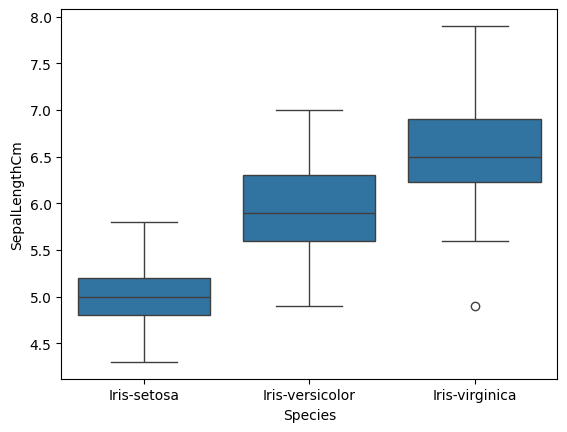

In [20]:
sns.boxplot(y= df1['SepalLengthCm'], x=df1['Species'])

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

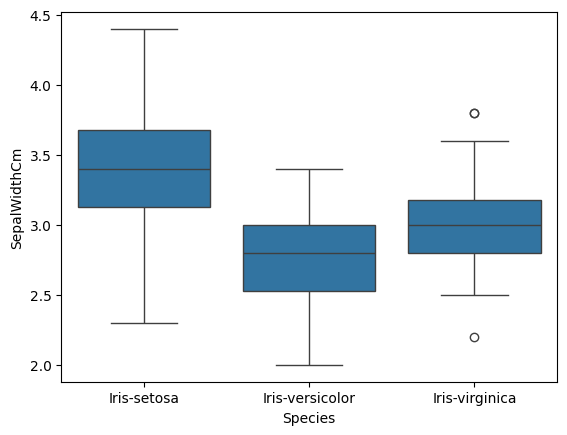

In [21]:
sns.boxplot(y= df1['SepalWidthCm'], x=df1['Species'])

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

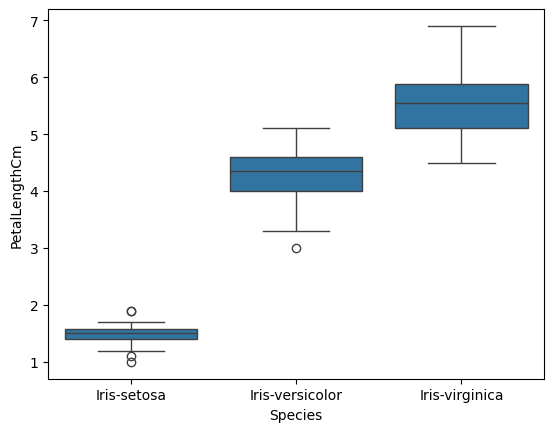

In [22]:
sns.boxplot(y= df1['PetalLengthCm'], x=df1['Species'])

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

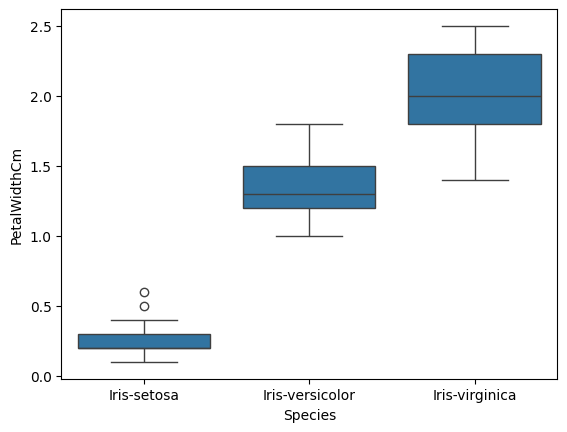

In [23]:
sns.boxplot(y= df1['PetalWidthCm'], x=df1['Species'])

In [24]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Checking how these features correlate

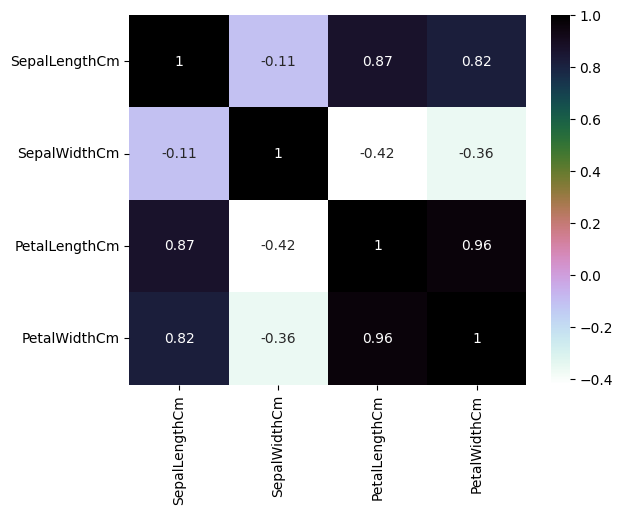

In [33]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

We can see that Petal Length and Width are highly correlated but Sepal Length and Sepal Width are not


Will use Decision Tree and KNN classifiation to try and predict the Species

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train1, test1 = train_test_split(df1, test_size = 0.3)

print(train1.shape)
print(test1.shape)

(105, 5)
(45, 5)


In [28]:
x_train = train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train=train1.Species

x_test= test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test =test1.Species

In [29]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
print('Accuracy of Decision Trees:', metrics.accuracy_score(pred1 ,y_test))

Accuracy of Decision Trees: 0.9555555555555556


In [30]:
train2, test2 = train_test_split(df1, test_size = 0.25)

print(train2.shape)
print(test2.shape)

(112, 5)
(38, 5)


In [31]:
x_train = train2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train=train2.Species

x_test= test2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test =test2.Species

In [32]:
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(x_train,y_train)
pred2 = model1.predict(x_test)
print('Accuracy of KNN:', metrics.accuracy_score(pred2 ,y_test))

Accuracy of KNN: 0.9736842105263158


Since KNN with 4 Neighbours gives greater accuracy than DecisionTree, that is the better classifier for this data set.